In [8]:
# 📦 Import all required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [9]:
# 📁 Step 1: Load and preprocess brain scan images
IMG_SIZE = 150
dataset_path = r"C:\Users\jeliz\brainscan"  # Update to match your system
data = []
labels = []
categories = ["yes", "no"]

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    label = 1 if category == "yes" else 0
    for file in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Skipped {file}: {e}")

data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

# 📊 Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)


In [10]:
# 🧠 Step 3: Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary output


C:\Users\jeliz\anaconda3\anaconda4\envs\brainscan_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 🧪 Step 4: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 🚀 Step 5: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - accuracy: 0.5316 - loss: 1.0730 - val_accuracy: 0.8095 - val_loss: 0.6200
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 397ms/step - accuracy: 0.7394 - loss: 0.5624 - val_accuracy: 0.7143 - val_loss: 0.5865
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.7365 - loss: 0.5171 - val_accuracy: 0.8095 - val_loss: 0.4771
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 620ms/step - accuracy: 0.7279 - loss: 0.6796 - val_accuracy: 0.7143 - val_loss: 0.6221
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 675ms/step - accuracy: 0.8310 - loss: 0.4935 - val_accuracy: 0.7619 - val_loss: 0.5708
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 654ms/step - accuracy: 0.7868 - loss: 0.4511 - val_accuracy: 0.8095 - val_loss: 0.5354
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 631ms/step - accuracy: 0.8296 - loss: 0.3794 - val_accuracy: 0.6667 - val_loss: 0.6649
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.8735 - loss: 0.3159 - val_accuracy: 0.7143 - val_loss:

In [13]:
# 🧾 Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8094 - loss: 0.3575
Test Accuracy: 0.8235


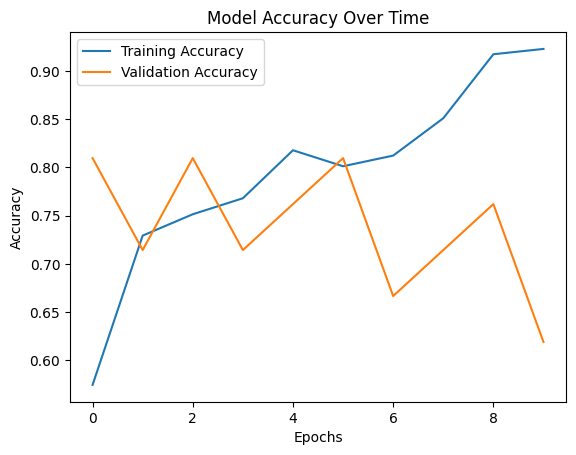

In [14]:
# 📈 Step 7: Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


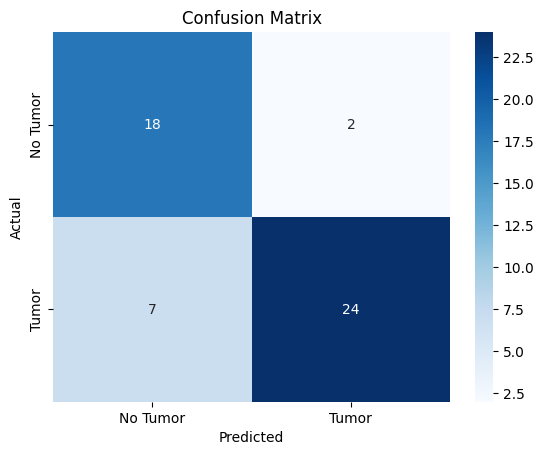

              precision    recall  f1-score   support

    No Tumor       0.72      0.90      0.80        20
       Tumor       0.92      0.77      0.84        31

    accuracy                           0.82        51
   macro avg       0.82      0.84      0.82        51
weighted avg       0.84      0.82      0.83        51



In [15]:
# 📉 Step 8: Confusion Matrix & Report
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).reshape(-1)
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_labels, target_names=['No Tumor', 'Tumor']))

In [16]:
# Save your model for future use
model.save("brain_tumor_classifier_model.h5")